###Predicting Air pressure system failures in Scania trucks
The dataset is made up of data collected from heavy Scania trucks that are used on a daily basis. The Air Pressure System (APS) is the system in question, which generates pressurized air that is used in a truck's various functions, such as braking and gear changes. Component failures for a specific component of the APS system make up the datasets' positive class. Trucks in the negative class have failed components that aren't related to the APS. The training set contains a total of 60000 examples, with 59000 in the negative class and 1000 in the positive class. There are 16000 examples in the test set. Each record has 171 attributes.

In [124]:
#importing all the packages required
import pandas as pd
import numpy as np
from google.colab import drive
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from keras.callbacks import EarlyStopping
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Dense, SimpleRNN
from sklearn.neural_network import MLPClassifier
from keras.layers.embeddings import Embedding
import numpy
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix, plot_confusion_matrix
from numpy.random import seed
seed(1)
from mlxtend.plotting import plot_confusion_matrix
import random


In [125]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [126]:
datafiles_path = "/content/drive/My Drive/project"
datafiles_names = os.listdir(path=datafiles_path)

In [127]:
print(datafiles_names[:3])

['aps_failure_description.txt', 'aps_failure_training_set.csv', 'aps_failure_test_set.csv']


##Loading Dataset


In [128]:
train = pd.read_csv('/content/drive/My Drive/project/aps_failure_training_set.csv', na_values='na')
test =  pd.read_csv('/content/drive/My Drive/project/aps_failure_test_set.csv', na_values='na')

In [129]:
train.shape

(60000, 171)

In [130]:
test.shape

(16000, 171)

In [131]:
train.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

##Exploration


In [132]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [133]:
test.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,...,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8.560355e+03,0.064969,0.242683
std,5.035350e+05,2.589224,7.966968e+08,1551.328109,118.186469,167.260463,6454.660300,8.925778e+04,2.358405e+05,1.025843e+06,...,1.255197e+06,5.828691e+05,1.267550e+06,1.259560e+06,1.199544e+06,1.628545e+06,5.368225e+05,5.329946e+04,3.374657,14.339059
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.280000e+02,0.000000,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.178000e+03,1.256000e+03,2.883500e+03,3.869500e+03,6.100000e+02,1.240000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.098200e+04,0.000000,1.590000e+02,130.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.409860e+05,1.147800e+05,2.297080e+05,1.956510e+05,9.657000e+04,4.201300e+04,3.985000e+03,0.000000e+00,0.000000,0.000000
75%,4.947900e+04,0.000000,1.003500e+03,430.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.391320e+05,2.189510e+05,4.714860e+05,4.034105e+05,2.790355e+05,1.699100e+05,1.389310e+05,1.907000e+03,0.000000,0.000000
max,4.294967e+07,58.000000,2.130707e+09,87038.000000,11044.000000,14186.000000,736174.000000,1.047252e+07,1.914916e+07,7.305747e+07,...,5.382333e+07,2.207969e+07,4.859750e+07,5.604348e+07,4.215944e+07,4.747137e+07,1.718575e+07,4.570398e+06,340.000000,1720.000000


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


##Null Ratio
Lets have a look at the null ratio of the features.

In [136]:
NULL_RATIO_TRHESHOLD = 0 # Set the null ratio threshold required


null_ratios = (train.isnull().sum() / train.shape[0])
null_ratios_over_threshold = null_ratios[null_ratios > NULL_RATIO_TRHESHOLD].sort_values(ascending=False)

data = [
    go.Bar(
        x=null_ratios_over_threshold.index,
        y=null_ratios_over_threshold
    )
]

fig = go.Figure(data=data, layout={
    "title": "Null Ratio for Features with Null Ratio Exceeding {}".format(NULL_RATIO_TRHESHOLD)
})

plotly.offline.iplot(fig)


We have quite a few features with a null ratio of more than 70%! Dropping high null ratio features from cross-validation grid search will be added later.

##correlation
###Let's have a look at the feature correlations.

In [137]:
train.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ab_000,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,0.068100,...,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
ac_000,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
ae_000,0.061971,0.031031,-0.004997,-0.000214,1.000000,0.823108,-0.000430,-0.000832,0.005057,0.034163,...,0.017338,0.024905,0.017311,0.039967,0.085884,0.052357,-0.010850,-0.008206,0.070886,0.041715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.606232,0.023867,-0.029417,-0.000829,0.052357,0.070306,0.000307,0.044186,0.182990,0.505565,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000715,0.002708
ee_008,0.471707,0.039369,0.016908,-0.002161,-0.010850,-0.013976,-0.000823,0.004878,0.009466,0.021151,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.006991,-0.002833
ee_009,0.248039,0.074119,0.024354,-0.001050,-0.008206,-0.010237,-0.001230,-0.004309,-0.009498,-0.019311,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003942,-0.000907
ef_000,0.019865,0.055590,-0.006571,-0.000102,0.070886,0.106281,-0.000072,0.002875,0.011824,0.020560,...,0.007118,0.017480,0.005835,0.050270,0.008461,-0.000715,-0.006991,-0.003942,1.000000,0.282184


Compute the feature correlation matrix.

In [138]:
corr = train[train.columns.difference(["class"])].corr()
corr.shape

(170, 170)

In [139]:
trace = go.Heatmap(z=corr.values,
                   x=corr.columns,
                   y=corr.index)

fig = go.Figure([trace], layout={
    "title": "Feature Correlations"
})
plotly.offline.iplot(fig)

We can see some clusters of highly correlated features.

##Target class distribution


In [142]:
class_value_counts = train["class"].value_counts()

trace = go.Pie(labels=class_value_counts.index, 
               values=class_value_counts.values,
               marker={
                   "colors": ["blue", "red"]
               })

data = [trace]
layout = go.Layout(title="Target Class Distribution for Training Set")

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

It appears that we have a dataset that is extremely unbalanced! To handle this directly in the cross-validation grid search later, we'll use ensembles of classifiers with random under/over sampling.

If we only resample once, we'll need an ensemble of classifiers to avoid sampling the wrong things.

In [143]:
#Class label Preprocessing
train_labels = train['class']
test_labels = test['class']
train_features = train.drop('class', axis=1)
test_features = test.drop('class', axis=1)

train_labels = train_labels.replace({'neg':0, 'pos' : 1})
test_labels = test_labels.replace({'neg':0, 'pos' : 1})

##Handling Missing Data

In [144]:
#Missing Value Analysis
miss_val = pd.DataFrame(train_features.isnull().sum())
miss_val = miss_val.reset_index()
miss_val = miss_val.rename(columns = {'index': 'Predictors', 0: 'Missing_Percentage'})
miss_val['Missing_Percentage'] = (miss_val['Missing_Percentage']/len(train_features))*100
miss_val = miss_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)
miss_val.head()

,Predictors,Missing_Percentage
0,br_000,82.106667
1,bq_000,81.203333
2,bp_000,79.566667
3,bo_000,77.221667
4,cr_000,77.215000


In [145]:
#Dropping Columns that have more than 35% missing values
dropped = list(miss_val.loc[miss_val['Missing_Percentage'] > 35,'Predictors'])
train_features.drop(columns = dropped, inplace = True)
test_features.drop(columns = dropped, inplace = True)

In [146]:
#Feature Scaling
scaler = MinMaxScaler()
scaler.fit(train_features)
train_features = pd.DataFrame(scaler.transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)

In [147]:
#Imputing Missing Values
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer.fit(train_features)
train_features = pd.DataFrame(imputer.transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(imputer.transform(test_features), columns=test_features.columns)

In [148]:
train_features.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.027925,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [149]:
test_features.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.000022,9.386557e-09,1.397901e-09,0.0,0.0,0.0,0.0,0.0,0.000042,2.069654e-05,...,0.000014,0.000004,0.000004,0.000011,0.000002,7.359084e-07,0.000000,0.000000,0.0,0.0
1,0.000030,3.191429e-08,4.659671e-09,0.0,0.0,0.0,0.0,0.0,0.000000,3.268794e-06,...,0.000014,0.000007,0.000017,0.000002,0.000003,3.863519e-06,0.000000,0.000000,0.0,0.0
2,0.024031,9.949750e-08,1.304708e-08,0.0,0.0,0.0,0.0,0.0,0.003146,5.936864e-03,...,0.006353,0.010074,0.004530,0.004693,0.041604,1.285164e-03,0.000027,0.000000,0.0,0.0
3,0.021778,4.740211e-07,1.090363e-07,0.0,0.0,0.0,0.0,0.0,0.000000,5.415448e-04,...,0.006939,0.006443,0.004975,0.008450,0.013648,1.756764e-03,0.014619,0.000848,0.0,0.0
4,0.000660,7.321514e-08,1.630885e-08,0.0,0.0,0.0,0.0,0.0,0.000000,3.146433e-07,...,0.000098,0.000110,0.000190,0.000867,0.000100,4.030771e-06,0.000004,0.000000,0.0,0.0


##Removing highly correlated features

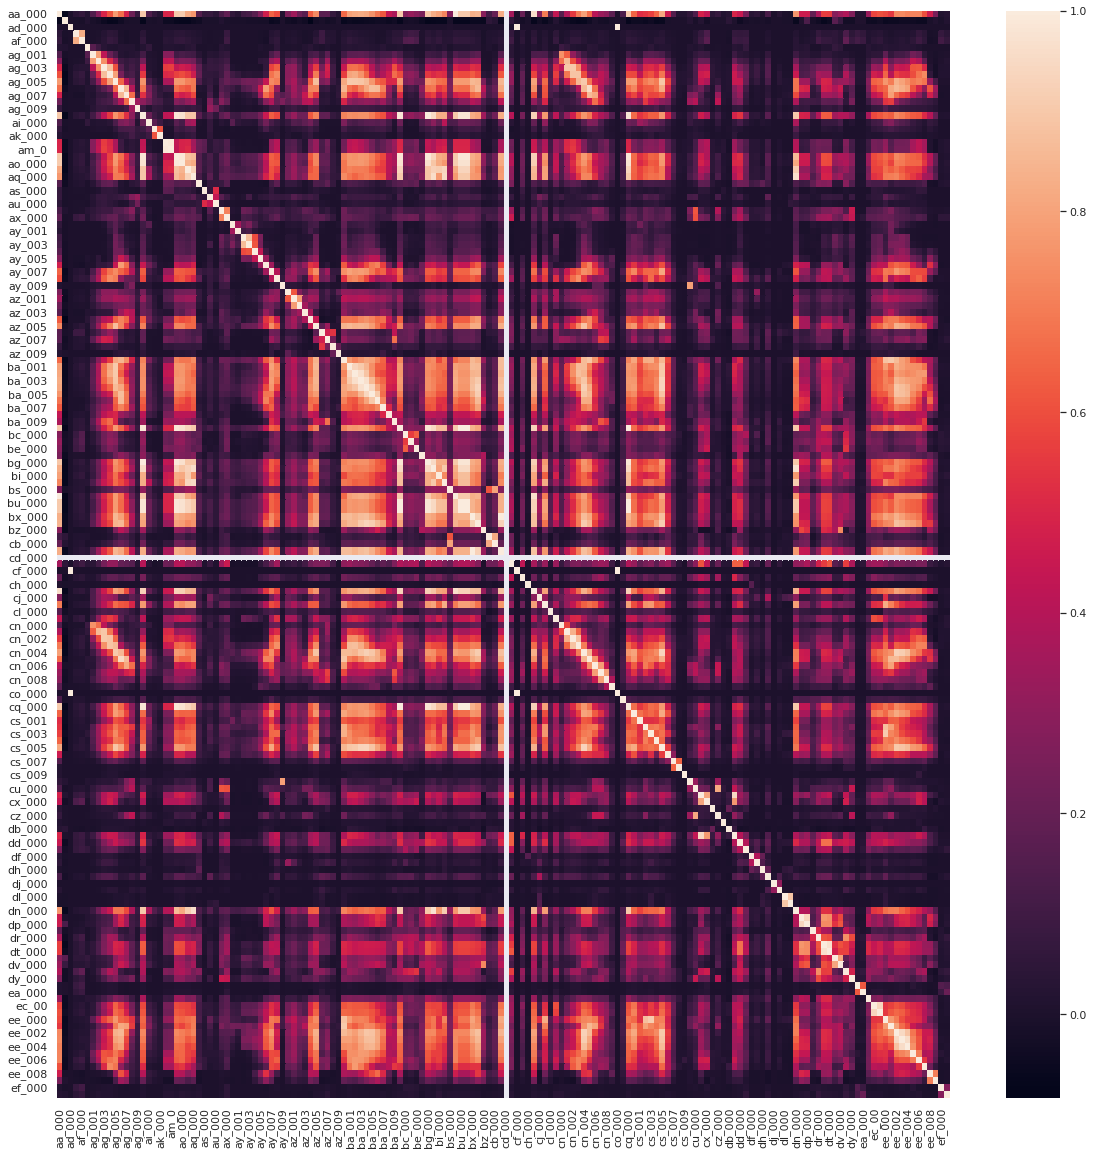

In [150]:
#Plotting heat map for feature correlation from correlation matrix
corr_matrix = train_features.corr()
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [151]:
#Setting correlation coefficient threshold as 0.8 to remove highly correlated features in train data
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]
train_imp_features = train_features.drop(train_features[to_drop], axis=1)
train_imp_features.head()

,ac_000,af_000,ag_000,ag_001,ag_008,ag_009,ai_000,aj_000,ak_000,am_0,...,ee_000,ee_001,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,9.999998e-01,0.000000,0.0,0.0,0.001463,0.0,0.0,0.000000,0.0,0.00000,...,0.012881,0.017378,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.000000e+00,0.000000,0.0,0.0,0.001787,0.0,0.0,0.000012,0.0,0.00000,...,0.008862,0.008391,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,1.070067e-07,0.000000,0.0,0.0,0.000679,0.0,0.0,0.000000,0.0,0.00000,...,0.003494,0.004616,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,3.285295e-08,0.000498,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00007,...,0.000076,0.000016,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,6.420405e-07,0.000000,0.0,0.0,0.000259,0.0,0.0,0.000040,0.0,0.00000,...,0.005398,0.009206,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [152]:
tri_df

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_000,-0.063876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_000,-0.001590,-0.001765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ae_000,0.043095,-0.004250,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
af_000,0.062855,-0.009480,-0.000209,0.823123,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.603888,-0.048648,-0.000801,0.035503,0.047858,0.000329,0.044185,0.182701,0.505149,0.736828,...,0.455031,0.447002,0.437894,0.380114,0.546124,NaN,NaN,NaN,NaN,NaN
ee_008,0.469836,-0.003714,-0.001235,-0.009632,-0.012347,-0.000787,0.004927,0.009562,0.021448,0.056865,...,0.454112,0.481672,0.459834,0.407250,0.374332,0.225378,NaN,NaN,NaN,NaN
ee_009,0.247149,0.013764,-0.000716,-0.007218,-0.008996,-0.001209,-0.004274,-0.009410,-0.019093,-0.017228,...,0.228527,0.239576,0.224931,0.190958,0.164162,0.061805,0.710167,NaN,NaN,NaN
ef_000,0.012409,-0.006262,-0.000082,0.070869,0.106312,-0.000078,0.001793,0.006870,0.012996,0.014008,...,0.003657,0.011816,0.003236,0.032363,0.004613,-0.001733,-0.005963,-0.003439,NaN,NaN


In [153]:
test_imp_features = test_features.drop(test_features[to_drop], axis=1)
test_imp_features.head()

,ac_000,af_000,ag_000,ag_001,ag_008,ag_009,ai_000,aj_000,ak_000,am_0,...,ee_000,ee_001,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,9.386557e-09,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000042,...,0.000100,0.000032,0.000004,0.000011,0.000002,7.359084e-07,0.000000,0.000000,0.0,0.0
1,3.191429e-08,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000011,0.0,0.000000,...,0.000134,0.000034,0.000017,0.000002,0.000003,3.863519e-06,0.000000,0.000000,0.0,0.0
2,9.949750e-08,0.0,0.0,0.0,0.000029,0.000000,0.0,0.000000,0.0,0.001977,...,0.005285,0.005479,0.004530,0.004693,0.041604,1.285164e-03,0.000027,0.000000,0.0,0.0
3,4.740211e-07,0.0,0.0,0.0,0.005231,0.000557,0.0,0.000000,0.0,0.000042,...,0.008796,0.007041,0.004975,0.008450,0.013648,1.756764e-03,0.014619,0.000848,0.0,0.0
4,7.321514e-08,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000136,0.000101,0.000190,0.000867,0.000100,4.030771e-06,0.000004,0.000000,0.0,0.0


In [154]:
#Dimensionality Reduction using SelectKBest (after removing correlated features)
random.seed(10)
selectKBest = SelectKBest(chi2, k=102)
selectKBest.fit(train_imp_features, train_labels)
best_train_features = selectKBest.transform(train_imp_features)
idxs_selected = selectKBest.get_support(indices=True)
best_train_features = train_imp_features.iloc[:,idxs_selected]
best_test_features = test_imp_features.iloc[:,idxs_selected]

In [155]:
best_train_features.shape

(60000, 102)

In [156]:
best_test_features.shape

(16000, 102)

In [157]:
#Balancing the dataset
number_samples = 2500
idxs_pos = train_labels[train_labels==1].index
idxs_neg = train_labels[train_labels==0].sample(n=number_samples, replace=False, random_state=0).index
idxs_balanced = np.concatenate((idxs_pos,idxs_neg))
best_train_features_balanced = best_train_features.loc[idxs_balanced]
train_labels_balanced = train_labels.loc[idxs_balanced]
print(f'Proportion balanced: {number_samples/1000}/1')

Proportion balanced: 2.5/1


In [158]:
best_train_features_balanced.shape

(3500, 102)

##train validation split

In [159]:


X_train, X_test, y_train, y_test = train_test_split(best_train_features_balanced, train_labels_balanced, test_size=0.1, random_state=3)

In [160]:
ele = [X_train, X_test, y_train, y_test]
for element in ele:
    print(element.shape)

(3150, 102)
(350, 102)
(3150,)
(350,)


In [161]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2247
1     903
Name: class, dtype: int64
0    253
1     97
Name: class, dtype: int64


##Building a basic neural network

In [162]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 102))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [163]:

classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_pred_t = classifier.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7968
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.2336 - accuracy: 0.9289
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9425
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1674 - accuracy: 0.9441
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1607 - accuracy: 0.9467
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1559 - accuracy: 0.9489
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1522 - accuracy: 0.9476
Epoch 8/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9498
Epoch 9/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1451 - accuracy: 0.9514
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9514

In [164]:
#Evaluating the basic neural network (validation dataset)
y_pred_t = (y_pred_t > 0.5)
report = classification_report(y_test, y_pred_t)
print(report)
cm = confusion_matrix(y_test, y_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       253
           1       0.91      0.82      0.86        97

    accuracy                           0.93       350
   macro avg       0.92      0.90      0.91       350
weighted avg       0.93      0.93      0.93       350

Total cost is: 8580.0


In [165]:
history=classifier.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
y_pred = classifier.predict(best_test_features)

Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1433 - accuracy: 0.9506
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9517
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1383 - accuracy: 0.9540
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1363 - accuracy: 0.9560
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9569
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9569
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1312 - accuracy: 0.9583
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1299 - accuracy: 0.9583
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1283 - accuracy: 0.9580
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1275 - accuracy: 0.9571

In [166]:
#Evaluating the basic neural network (test dataset)
y_pred = (y_pred > 0.5)
report = classification_report(test_labels, y_pred)
print(report)
cm = confusion_matrix(test_labels, y_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.39      0.94      0.56       375

    accuracy                           0.96     16000
   macro avg       0.70      0.95      0.77     16000
weighted avg       0.98      0.96      0.97     16000

Total cost is: 15950.0


In [167]:
confusion_matrix(test_labels, y_pred)

array([[15080,   545],
       [   21,   354]])

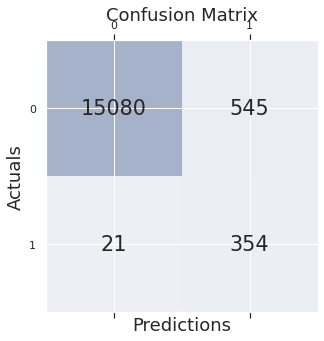

In [216]:
conf_matrix=confusion_matrix(test_labels, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [169]:
fig, ax

(<Figure size 540x540 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83e5af6f50>)

In [170]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


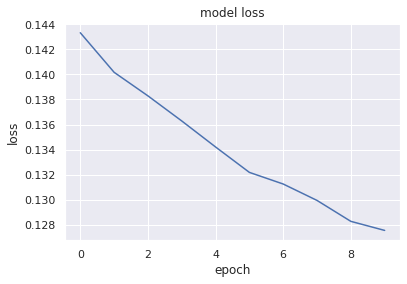

In [171]:
# summarize history for loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.95456


<function matplotlib.pyplot.show>

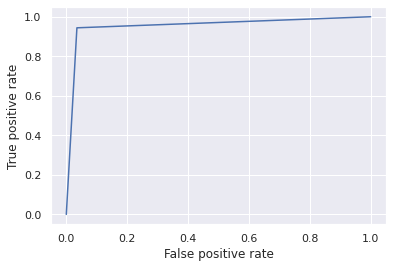

In [172]:
#AUROC
plt.figure(figsize=(6, 4))
ann_auc=roc_auc_score(test_labels,y_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,y_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Building a Recurrent Neural Network

In [173]:
# Set up parameters
time_steps = 102
hidden_units = 2
epochs = 30

In [174]:
# Create a traditional RNN network
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model

In [175]:
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model_RNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [176]:
model_RNN.fit(X_train, y_train, epochs=10, batch_size=10, verbose=2)
yy_pred_t = model_RNN.predict(X_test)

Epoch 1/10
315/315 - 5s - loss: 0.1656 - 5s/epoch - 17ms/step
Epoch 2/10
315/315 - 7s - loss: 0.1166 - 7s/epoch - 24ms/step
Epoch 3/10
315/315 - 7s - loss: 0.0926 - 7s/epoch - 23ms/step
Epoch 4/10
315/315 - 8s - loss: 0.0809 - 8s/epoch - 25ms/step
Epoch 5/10
315/315 - 8s - loss: 0.0737 - 8s/epoch - 24ms/step
Epoch 6/10
315/315 - 7s - loss: 0.0708 - 7s/epoch - 24ms/step
Epoch 7/10
315/315 - 4s - loss: 0.0685 - 4s/epoch - 12ms/step
Epoch 8/10
315/315 - 4s - loss: 0.0668 - 4s/epoch - 11ms/step
Epoch 9/10
315/315 - 4s - loss: 0.0651 - 4s/epoch - 12ms/step
Epoch 10/10
315/315 - 4s - loss: 0.0646 - 4s/epoch - 12ms/step


In [177]:
#Evaluating the Recurrent Neural Network(validation dataset)
yy_pred_t = (yy_pred_t > 0.5)
report = classification_report(y_test, yy_pred_t)
print(report)
cm = confusion_matrix(y_test, yy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       253
           1       0.90      0.72      0.80        97

    accuracy                           0.90       350
   macro avg       0.90      0.85      0.87       350
weighted avg       0.90      0.90      0.90       350

Total cost is: 13580.0


In [178]:
history=model_RNN.fit(best_train_features_balanced, train_labels_balanced, epochs=10, batch_size=10, verbose=2)
yy_pred = model_RNN.predict(best_test_features)

Epoch 1/10
350/350 - 4s - loss: 0.0647 - 4s/epoch - 12ms/step
Epoch 2/10
350/350 - 4s - loss: 0.0648 - 4s/epoch - 12ms/step
Epoch 3/10
350/350 - 4s - loss: 0.0634 - 4s/epoch - 12ms/step
Epoch 4/10
350/350 - 5s - loss: 0.0640 - 5s/epoch - 15ms/step
Epoch 5/10
350/350 - 4s - loss: 0.0631 - 4s/epoch - 11ms/step
Epoch 6/10
350/350 - 4s - loss: 0.0635 - 4s/epoch - 12ms/step
Epoch 7/10
350/350 - 4s - loss: 0.0625 - 4s/epoch - 12ms/step
Epoch 8/10
350/350 - 4s - loss: 0.0628 - 4s/epoch - 12ms/step
Epoch 9/10
350/350 - 5s - loss: 0.0638 - 5s/epoch - 14ms/step
Epoch 10/10
350/350 - 4s - loss: 0.0630 - 4s/epoch - 12ms/step


In [179]:
#Evaluating the Recurrent Neural Network(test dataset)
yy_pred = (yy_pred > 0.5)
report = classification_report(test_labels, yy_pred)
print(report)
cm = confusion_matrix(test_labels, yy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.32      0.85      0.46       375

    accuracy                           0.95     16000
   macro avg       0.66      0.90      0.72     16000
weighted avg       0.98      0.95      0.96     16000

Total cost is: 35860.0


In [180]:
confusion_matrix(test_labels, yy_pred)

array([[14939,   686],
       [   58,   317]])

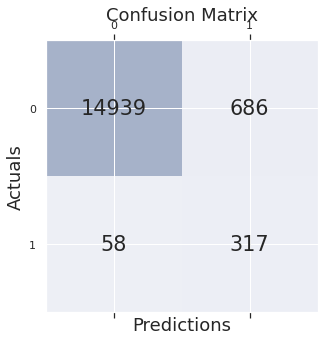

In [215]:
conf_matrix=confusion_matrix(test_labels, yy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

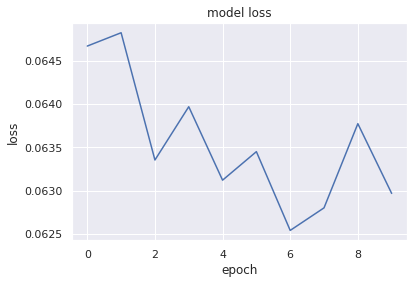

In [182]:
# summarize history for loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9007146666666668


<function matplotlib.pyplot.show>

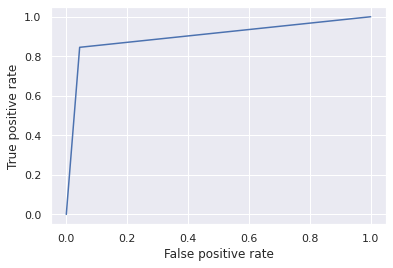

In [183]:
#AUROC
plt.figure(figsize=(6, 4))
ann_auc=roc_auc_score(test_labels,yy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Building a Multi-Layer Perceptron

In [184]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [185]:
# Fit data onto the model for train/val set
clf.fit(X_train, y_train)
yyy_pred_t=clf.predict(X_test)

Iteration 1, loss = 0.61931091
Iteration 2, loss = 0.42800499
Iteration 3, loss = 0.26794575
Iteration 4, loss = 0.19811462
Iteration 5, loss = 0.17539220
Iteration 6, loss = 0.16351060
Iteration 7, loss = 0.15466440
Iteration 8, loss = 0.14870386
Iteration 9, loss = 0.14265053
Iteration 10, loss = 0.13764479
Iteration 11, loss = 0.13352625
Iteration 12, loss = 0.12984702
Iteration 13, loss = 0.12662185
Iteration 14, loss = 0.12382112
Iteration 15, loss = 0.12064982
Iteration 16, loss = 0.12158904
Iteration 17, loss = 0.11747695
Iteration 18, loss = 0.11579350
Iteration 19, loss = 0.11426141
Iteration 20, loss = 0.11317695
Iteration 21, loss = 0.11223700
Iteration 22, loss = 0.11269465
Iteration 23, loss = 0.11023701
Iteration 24, loss = 0.11286364
Iteration 25, loss = 0.10856127
Iteration 26, loss = 0.10968053
Iteration 27, loss = 0.10563138
Iteration 28, loss = 0.10556552
Iteration 29, loss = 0.10405257
Iteration 30, loss = 0.10318853
Iteration 31, loss = 0.10383682
Iteration 32, los

In [186]:
#Evaluating the Multi-Layer Perceptron (validation data set)
yyy_pred_t = (yyy_pred_t > 0.5)
report = classification_report(y_test, yyy_pred_t)
print(report)
cm = confusion_matrix(y_test, yyy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       253
           1       0.91      0.94      0.92        97

    accuracy                           0.96       350
   macro avg       0.94      0.95      0.95       350
weighted avg       0.96      0.96      0.96       350

Total cost is: 3090.0


In [187]:
# Fit data onto the model
clf.fit(best_train_features_balanced, train_labels_balanced)
yyy_pred=clf.predict(best_test_features)

Iteration 1, loss = 0.60869590
Iteration 2, loss = 0.39685694
Iteration 3, loss = 0.23825679
Iteration 4, loss = 0.19133780
Iteration 5, loss = 0.17323213
Iteration 6, loss = 0.16076572
Iteration 7, loss = 0.15263559
Iteration 8, loss = 0.14629747
Iteration 9, loss = 0.13965487
Iteration 10, loss = 0.13476722
Iteration 11, loss = 0.13122219
Iteration 12, loss = 0.12779601
Iteration 13, loss = 0.12502237
Iteration 14, loss = 0.12405792
Iteration 15, loss = 0.12053225
Iteration 16, loss = 0.11968189
Iteration 17, loss = 0.11850682
Iteration 18, loss = 0.11648080
Iteration 19, loss = 0.11467374
Iteration 20, loss = 0.11454679
Iteration 21, loss = 0.11392685
Iteration 22, loss = 0.11189137
Iteration 23, loss = 0.11208394
Iteration 24, loss = 0.11132616
Iteration 25, loss = 0.10872367
Iteration 26, loss = 0.11444662
Iteration 27, loss = 0.10868603
Iteration 28, loss = 0.10745128
Iteration 29, loss = 0.10681607
Iteration 30, loss = 0.10513436
Iteration 31, loss = 0.10478116
Iteration 32, los

In [188]:
#Evaluating the Multi-Layer Perceptron (test data set)
yyy_pred = (yyy_pred > 0.5)
report = classification_report(test_labels, yyy_pred)
print(report)
cm = confusion_matrix(test_labels, yyy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15625
           1       0.45      0.91      0.60       375

    accuracy                           0.97     16000
   macro avg       0.72      0.94      0.79     16000
weighted avg       0.99      0.97      0.98     16000

Total cost is: 20230.0


In [189]:
confusion_matrix(test_labels, yyy_pred)


array([[15202,   423],
       [   32,   343]])

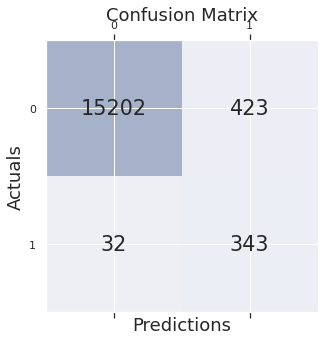

In [214]:
conf_matrix=confusion_matrix(test_labels, yyy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

AREA UNDER ROC:  0.9437973333333334


<function matplotlib.pyplot.show>

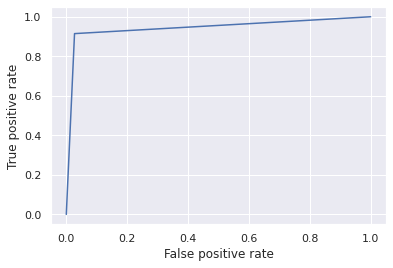

In [191]:
#AUROC
plt.figure(figsize=(6, 4))
ann_auc=roc_auc_score(test_labels,yyy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yyy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Artificial neural network [different layers 60,30,15 ,1]

In [192]:
#creating layers and setting the activation function
model = Sequential([
    Dense(60, activation='relu', input_dim=102 ),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [193]:
#compiler settings for the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [194]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)
yyyy_pred_t = model.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.8981
Epoch 2/10
315/315 [==============================] - 1s 3ms/step - loss: 0.1554 - accuracy: 0.9483
Epoch 3/10
315/315 [==============================] - 3s 9ms/step - loss: 0.1417 - accuracy: 0.9521
Epoch 4/10
315/315 [==============================] - 2s 6ms/step - loss: 0.1349 - accuracy: 0.9552
Epoch 5/10
315/315 [==============================] - 2s 6ms/step - loss: 0.1286 - accuracy: 0.9568
Epoch 6/10
315/315 [==============================] - 3s 8ms/step - loss: 0.1257 - accuracy: 0.9584
Epoch 7/10
315/315 [==============================] - 2s 6ms/step - loss: 0.1172 - accuracy: 0.9619
Epoch 8/10
315/315 [==============================] - 1s 5ms/step - loss: 0.1167 - accuracy: 0.9638
Epoch 9/10
315/315 [==============================] - 2s 5ms/step - loss: 0.1126 - accuracy: 0.9632
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9670

In [195]:
#Evaluating the Artificial n n (basic) (Validation data set)
yyyy_pred_t = (yyyy_pred_t > 0.5)
report = classification_report(y_test, yyyy_pred_t)
print(report)
cm = confusion_matrix(y_test, yyyy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       253
           1       0.92      0.91      0.91        97

    accuracy                           0.95       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.95      0.95      0.95       350

Total cost is: 4580.0


In [196]:
history=model.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
yyyy_pred = model.predict(best_test_features)


Epoch 1/10
350/350 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9631
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1079 - accuracy: 0.9634
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9666
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9643
Epoch 5/10
350/350 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9654
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9680
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9703
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9706
Epoch 9/10
350/350 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9711
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9723

In [197]:
#Evaluating the Artificial n n (basic) (Test data set)
yyyy_pred = (yyyy_pred > 0.5)
report = classification_report(test_labels, yyyy_pred)
print(report)
cm = confusion_matrix(test_labels, yyyy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.53      0.91      0.67       375

    accuracy                           0.98     16000
   macro avg       0.76      0.94      0.83     16000
weighted avg       0.99      0.98      0.98     16000

Total cost is: 20050.0


In [198]:
confusion_matrix(test_labels, yyyy_pred)

array([[15320,   305],
       [   34,   341]])

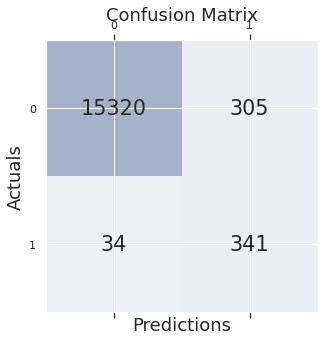

In [213]:
conf_matrix=confusion_matrix(test_labels, yyyy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

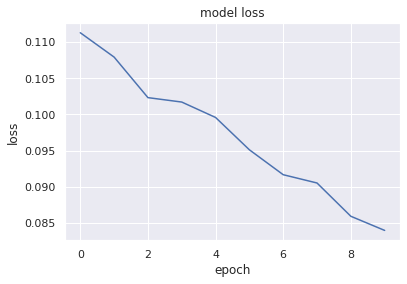

In [200]:
# summarize history for loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9449066666666667


<function matplotlib.pyplot.show>

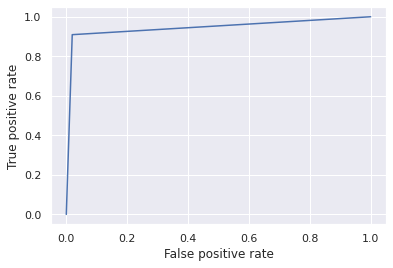

In [201]:
#AUROC
plt.figure(figsize=(6, 4))
ann_auc=roc_auc_score(test_labels,yyyy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yyyy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Artificial neural network [different layers 64,32,16 ,1]

In [202]:
model = Sequential([
    Dense(64, activation='relu', input_dim=102 ),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [203]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [204]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)
y5_pred_t = model.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.9229
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9498
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1387 - accuracy: 0.9521
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1288 - accuracy: 0.9571
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9590
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1189 - accuracy: 0.9594
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9632
Epoch 8/10
315/315 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9635
Epoch 9/10
315/315 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9654
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9663

In [205]:
#Evaluating the Artificial neural network [different layers 64,32,16 ,1] (validation data set)
y5_pred_t = (y5_pred_t > 0.5)
report = classification_report(y_test, y5_pred_t)
print(report)
cm = confusion_matrix(y_test, y5_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       253
           1       0.92      0.89      0.91        97

    accuracy                           0.95       350
   macro avg       0.94      0.93      0.93       350
weighted avg       0.95      0.95      0.95       350

Total cost is: 5570.0


In [206]:
history=model.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
y5_pred = model.predict(best_test_features)

Epoch 1/10
350/350 [==============================] - 1s 3ms/step - loss: 0.1091 - accuracy: 0.9654
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9640
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9669
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9674
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9706
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9709
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9737
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9729
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9749
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9751

In [207]:
#Evaluating the Artificial neural network [different layers 64,32,16 ,1] (test data set)
y5_pred = (y5_pred > 0.5)
report = classification_report(test_labels, y5_pred)
print(report)
cm = confusion_matrix(test_labels, y5_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     15625
           1       0.29      0.97      0.45       375

    accuracy                           0.94     16000
   macro avg       0.65      0.96      0.71     16000
weighted avg       0.98      0.94      0.96     16000

Total cost is: 14680.0


In [208]:
confusion_matrix (test_labels, y5_pred)

array([[14757,   868],
       [   12,   363]])

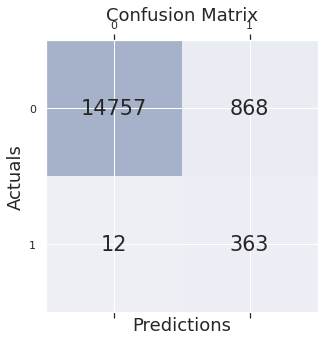

In [212]:
conf_matrix=confusion_matrix(test_labels, y5_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

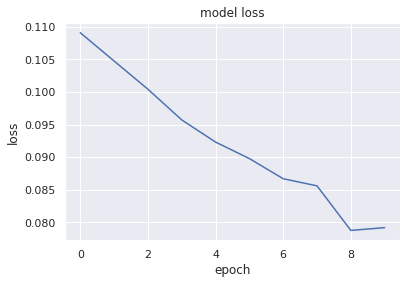

In [210]:
# summarize history for loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.956224


<function matplotlib.pyplot.show>

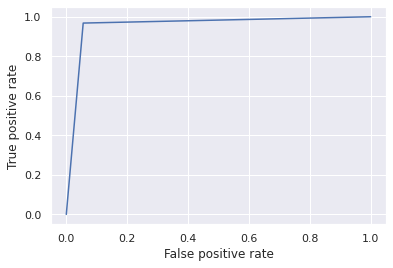

In [211]:
#AUROC
plt.figure(figsize=(6, 4))
ann_auc=roc_auc_score(test_labels,y5_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,y5_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show